## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [1]:
%pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np

Note: you may need to restart the kernel to use updated packages.


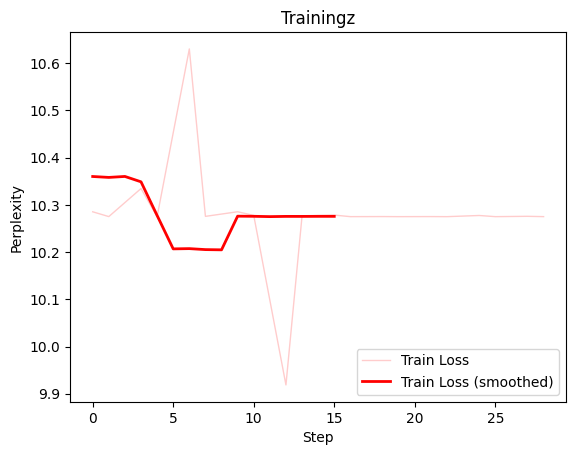

In [16]:
import pandas as pd
import numpy as np

tdat = pd.read_csv('lightning_logs/version_0/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]
if True:
    import matplotlib.pyplot as plt

    xspace = np.linspace(0, len(train), len(train))
    fsz = max(5, len(train)//10)
    filter = np.ones(fsz)/fsz

    plt.plot( train, label = 'Train Loss', color='#fcc', linewidth=1)
    plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
    if False or 'val' in tdat:
        val = tdat.val_loss[~np.isnan(tdat.val_loss)]
        plt.plot( val, label = 'Val\'n Loss', color='#ccf', linewidth=1)
        plt.plot( np.convolve(val, filter, mode='valid'), label = 'Val\'n Loss (smoothed)', color='b', linewidth=2)

    plt.xlabel('Step')
    plt.ylabel('Perplexity')
    plt.legend(loc='lower right')
    plt.title('Trainingz')
    plt.show()


In [15]:
tdat

,val_loss,epoch,step,test_loss
0,10.367910,0,0,NaN
1,10.324639,1,1,NaN
2,10.353209,2,2,NaN
3,10.393350,3,3,NaN
4,10.548785,4,4,NaN
5,10.852798,5,5,NaN
6,11.001992,6,6,NaN
7,11.159985,7,7,NaN
8,11.327953,8,8,NaN
9,11.422785,9,9,NaN
